# Prova Prática: Case On-line

Etapa prática do processo seletivo 00122/2024 - Pesquisador I - Inteligência Artificial
Candidata: Olesya Galkina

## Introdução

Recentemente, uma indústria de grande porte localizada em São Paulo contratou um projeto para implementar um sistema completo de manutenção preditiva em seu chão de fábrica. Com o suporte do time de software do SENAI, um banco de dados robusto foi modelado e implementado para armazenar os dados coletados pelos sensores. Esses dados foram então disponibilizados para o time de IA, permitindo análises avançadas para identificar padrões e tendências nos equipamentos.

## Objetivo

O objetivo desse projeto é analisar os dados coletados das máquinas e equipamentos e desenvolver um modelo de aprendizado de máquina para identificar padrões do equipamento em análise. Desenvolver o pipeline completo de um projeto de aprendizado de máquina, desde a análise e preparação dos dados adquiridos até a disponibilização do algoritmo no GitHub.

O projeto é organizado da seguinte forma: 
1. Pré-processamento de dados. É a etapa de transformação de dados brutos em uma forma que o modelo de aprendizado de máquina possa entender. 
2. Escolha de modelo de aprendizado de máquina. Foi escolhido o modelo _k-means_, um algoritmo de aprendizado não-supervisionado que gera k agrupamentos a partir de um conjunto de dados. Justificativa: como os dados não são rotulados, deixamos o algoritmo sozinho para encontrar estrutura nas entradas fornecidas e descobrir novos padrões e tendências nos equipamentos.
3. Avaliação da inércia e _silhouette score_ para escolher o número ideal _k_ de clusters.
4. Construção e afinamento (_tuning_) de pipeline.
5. Conclusão.

## Pré-processamento de dados

Esta etapa inclui importação de bibliotécas e pacotes necessários, análise exploratória de dados, redimensão e normalização de dados.

In [63]:
# bibliotécas para manipulação de dados
import numpy as np
import pandas as pd

# bibliotécas e pacotes para construir o módelo 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# para construir pipeline
from sklearn.pipeline import Pipeline 
from sklearn import set_config
set_config(display='diagram')

# bibliotécas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# pacotes auxilares
import warnings
warnings.filterwarnings('ignore')

In [83]:
# acessamos os dados de classes

classes = np.load('/home/olesya/Документы/A_Rabota/Rabota/Python/FIESC/Classes.npy', allow_pickle=True)

np.unique(classes)

array(['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'],
      dtype=object)

Temos 5 classes. Guardamos esse número para análise futuro.

In [3]:
# acessamos os dados

dados_2_np = np.load('/home/olesya/Документы/A_Rabota/Rabota/Python/FIESC/Dados_3.npy', allow_pickle=True)
dados_2_np

array([[-0.1820779 , -0.16599049,  0.14775694, ..., -0.27689404,
        -0.28825996,         nan],
       [-0.06512225, -0.23241759, -0.46459481, ...,  0.07635082,
         0.12836449,         nan],
       [-0.05799709, -0.03017463, -0.00542542, ...,  0.00076402,
         0.01006107,         nan],
       ...,
       [-0.17826637,  0.12885381, -0.3725343 , ..., -0.06675331,
         0.10746974,         nan],
       [ 0.40034818,  0.20420023,  0.22143797, ...,  0.27792418,
         0.63366714,         nan],
       [ 0.10108285, -0.30066461, -0.57554128, ..., -0.49926773,
        -0.39475106,         nan]])

Temos arrays NumPy bidimensionais com os valores x e y.

In [5]:
# verificamos a estrutura

dados_2_np.shape

(50000, 201)

Temos o conjunto de 50000 arrays, cada um com 201 entradas. Para facilitar a visualização, transformamos em pandas dataframe:

In [6]:
dados_2_df = pd.DataFrame(dados_2_np)
dados_2_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.182078,-0.165990,0.147757,0.096662,-0.056907,-0.310580,-0.470552,-0.273967,-0.233207,0.225104,...,0.328633,0.500143,0.550680,0.321061,0.138348,-0.058564,-0.195702,-0.276894,-0.288260,NaN
1,-0.065122,-0.232418,-0.464595,-0.510616,-0.201496,-0.074505,-0.114415,0.194517,0.411912,0.521579,...,0.268816,0.749696,-0.057662,0.055156,-0.692248,-0.331509,-0.041532,0.076351,0.128364,NaN
2,-0.057997,-0.030175,-0.005425,0.009177,0.013701,-0.011606,-0.009907,-0.016371,0.001897,0.010207,...,-0.039403,-0.042588,-0.008130,0.013023,0.004155,-0.002979,-0.005700,0.000764,0.010061,NaN
3,-0.200595,0.315052,0.170669,0.268558,0.201994,-0.371161,-0.040613,-0.098962,0.364336,-0.112432,...,-0.091030,-0.055542,0.326169,0.212304,0.196199,0.237998,0.140512,-0.038527,0.052666,NaN
4,0.519974,0.341149,0.177562,0.133386,-0.224563,-0.336170,-0.318349,-0.283470,-0.142941,-0.067672,...,-0.092936,-0.172695,-0.195384,-0.185443,0.019908,0.100448,0.390107,0.020646,0.221575,NaN
5,-0.252892,-0.109058,-0.038261,-0.039935,-0.073363,-0.111195,0.035154,0.086669,0.203762,-0.015667,...,-0.207411,-0.121772,0.137232,0.267666,0.284860,-0.066745,-0.259133,-0.258755,0.109187,NaN
6,-0.464226,-0.090833,-0.025556,0.303060,0.163810,-0.138022,-0.380149,-0.367487,0.325989,0.382235,...,0.059620,-0.181237,-0.291101,-0.087210,0.433313,0.445640,0.244367,0.001288,-0.293591,NaN
7,-0.081690,-0.008447,0.128382,0.094344,0.253493,0.286509,0.266584,0.066170,-0.007520,-0.016362,...,-0.144237,-0.266550,-0.226048,-0.360147,-0.158385,-0.017787,0.313868,0.221361,0.219481,NaN
8,0.061783,0.178584,0.369779,0.129146,-0.398417,-0.745438,-0.683054,-0.312537,0.153260,-0.085253,...,-0.168454,-0.097692,0.051275,-0.002386,-0.268395,-0.102920,0.106079,0.222932,0.361855,NaN
9,-0.151388,-0.254463,-0.004138,-0.051790,-0.072522,-0.092859,-0.263013,0.018491,-0.106620,0.147903,...,0.092893,-0.408529,-0.270421,-0.075441,0.104251,0.240178,0.096061,-0.080205,-0.389188,NaN


Podemos ver que estão faltando os dados na última coluna. Vamos verificar quanto está faltando.

In [7]:
dados_2_df.isna().sum()

0          0
1          0
2          0
3          0
4          0
       ...  
196        0
197        0
198        0
199        0
200    49999
Length: 201, dtype: int64

A última coluna não contem dados. Podemos apagar a coluna sem prejudicar a análise.

In [8]:
df = dados_2_df.dropna(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.182078,-0.165990,0.147757,0.096662,-0.056907,-0.310580,-0.470552,-0.273967,-0.233207,0.225104,...,-0.345416,0.328633,0.500143,0.550680,0.321061,0.138348,-0.058564,-0.195702,-0.276894,-0.288260
1,-0.065122,-0.232418,-0.464595,-0.510616,-0.201496,-0.074505,-0.114415,0.194517,0.411912,0.521579,...,0.118776,0.268816,0.749696,-0.057662,0.055156,-0.692248,-0.331509,-0.041532,0.076351,0.128364
2,-0.057997,-0.030175,-0.005425,0.009177,0.013701,-0.011606,-0.009907,-0.016371,0.001897,0.010207,...,-0.018148,-0.039403,-0.042588,-0.008130,0.013023,0.004155,-0.002979,-0.005700,0.000764,0.010061
3,-0.200595,0.315052,0.170669,0.268558,0.201994,-0.371161,-0.040613,-0.098962,0.364336,-0.112432,...,-0.178936,-0.091030,-0.055542,0.326169,0.212304,0.196199,0.237998,0.140512,-0.038527,0.052666
4,0.519974,0.341149,0.177562,0.133386,-0.224563,-0.336170,-0.318349,-0.283470,-0.142941,-0.067672,...,-0.287856,-0.092936,-0.172695,-0.195384,-0.185443,0.019908,0.100448,0.390107,0.020646,0.221575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.012576,-0.217017,-0.447889,0.121566,0.202355,-0.142117,-0.135224,-0.458723,-0.101718,-0.174008,...,-0.622636,-0.189684,-0.068968,0.145456,0.324126,0.103083,0.226159,-0.002738,0.292836,0.211025
49996,0.177279,0.310897,0.291840,0.116200,-0.056778,0.041395,0.099778,-0.148590,-0.225043,-0.311893,...,0.073329,-0.240410,-0.186413,0.109169,0.365023,0.280525,-0.076179,-0.074368,0.162273,0.088103
49997,-0.178266,0.128854,-0.372534,-0.303171,-0.121377,-0.314915,0.002670,-0.409036,-0.347081,-0.281967,...,0.141301,-0.037849,0.083648,0.042236,-0.040167,-0.136958,-0.245904,-0.155449,-0.066753,0.107470
49998,0.400348,0.204200,0.221438,0.143413,0.396236,0.219747,-0.147800,-0.378011,-0.289513,0.126167,...,-0.159166,-0.095366,0.133241,0.153097,0.083467,-0.585680,-0.457916,0.042339,0.277924,0.633667


In [9]:
# verificamos os tipos de dados

df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
195    float64
196    float64
197    float64
198    float64
199    float64
Length: 200, dtype: object

Os dados são do tipo _float64_, ou seja, o conjunto de dados contem aproximação mais próxima de números reais.  

O próximo passo é relacionado com a dimensionalidade dos dados. Nosso caso, as dimensoes "reais" dos dados não correspondem as dimensões que conhecemos. A _Análise de Componentes Principais (ACP)_ ou _Principal Component Analysis (PCA)_ é um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de _componentes principais_. Em outras palavras, PCA transforma os dados de entrada projetando-os em um número menor de dimensões (componentes).

In [10]:
# reduzimos de dimensionalidade usando PCA

df_reduced = PCA(n_components=2, random_state=42).fit_transform(df)
df_reduced 

array([[-0.29102417, -1.03983252],
       [-0.15651481,  0.70785443],
       [-0.06113172, -0.01476923],
       ...,
       [-1.38454281,  0.98704442],
       [-0.96371639,  0.23341118],
       [-0.91017774, -0.30900412]])

A ultima etapa de pré-processamento de dados para a maioria dos algoritmos de aprendizado de máquina baseados à distância é redimensionamento (_scaling_) de dados. Essa etapa pode ter um impacto significativo no desempenho do algoritmo de aprendizado de máquina.


Para redimensionar os dados usamos `MinMaxScaler`, pois não podemos assumir que a forma de todos os dados segue uma distribuição normal (nesse caso, poderíamos usar `StandardScaler`, por exemplo). `MinMaxScaler` redimensiona os dados de forma que todos os valores estejam no intervalo de [0, 1].


In [12]:
# utilizamos MinMaxScaler

df_scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(df_reduced)
df_scaled

array([[0.43173105, 0.27781365],
       [0.45728721, 0.63770694],
       [0.47540956, 0.48890031],
       ...,
       [0.22396755, 0.69519928],
       [0.30392263, 0.54000698],
       [0.31409473, 0.42830984]])

## Construindo o modelo de aprendizado

Primeiro, vamos separar os dados para treinamento (80%) e teste (20%) usando a função `train_test_split` da `sklearn.model_selection`.

In [13]:
df_train, df_test = train_test_split(df_scaled, test_size=0.20, random_state=42)

In [14]:
# verificamos os dados divididos

for x in [df_train, df_test]:
    print(len(x))

40000
10000


Agora que os dados estão pré-processados e divididos em conjutos de treinamento e teste, podemos começar a modelar. Como não sabemos quantos clusters existem nos dados, começaremos examinando os valores de inércia para diferentes valores de k.

Começaremos instanciando o modelo. Se quisermos construir um modelo que agrupe os dados em 3 clusters, definiremos o parâmetro `n_clusters` como 3. Também definiremos o `random_state` igual a _42_. Isso vai ajudar a reproduzir os resultados.

In [15]:
# instanciar modelo k-means para 3 clusters e fazer ajuste 

kmeans3 = KMeans(n_clusters=3, random_state=42).fit(df_train)

In [16]:
print('Clusters: ', kmeans3.labels_)
print('Inércia: ', kmeans3.inertia_)

Clusters:  [0 1 2 ... 2 2 1]
Inércia:  751.7422591225916


In [17]:
# o número de iterações necessárias para convergir

kmeans3.n_iter_

5

Como foi especificado _n__components=2_ na etapa de redução de dimensão, fica possível visualizar os dados. Visualizamos os resultados através de gráfico de dispersão usando um datadrame de Pandas e a biblioteca `seaborn`.

In [18]:
# transformamos array em dataframe

df_viz_k3 = pd.DataFrame(df_train, columns = ["component_1", "component_2"])
df_viz_k3.head()

,component_1,component_2
0,0.548348,0.714920
1,0.702919,0.337144
2,0.431018,0.560622
3,0.445137,0.535683
4,0.530451,0.403651


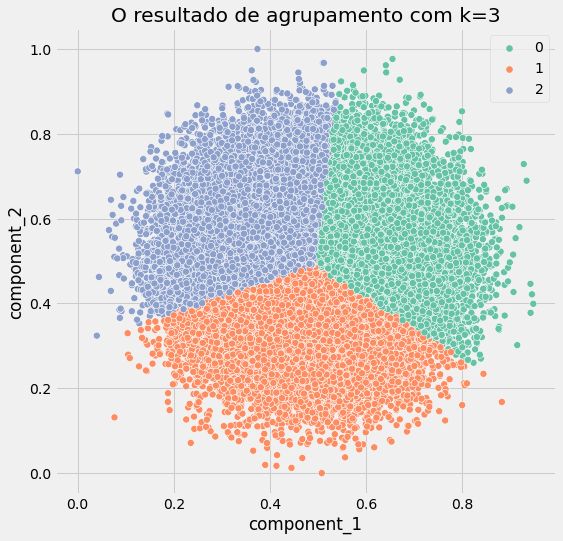

In [19]:
# construimos o gráfico de dispersão

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))

scat = sns.scatterplot('component_1', 'component_2',
       s=50,
       data=df_viz_k3,
       hue=kmeans3.labels_,
       #style=classes_tp,
        palette="Set2")
 
scat.set_title("O resultado de agrupamento com k=3")
plt.legend()
plt.show()

## Escolhendo o número _k_

Existem várias formas de escolher o _k_. Os métodos mais comuns são o método do cotovelo (_elbow method_) e o coeficiente de silhueta (_silhouette score_). São frequentemente utilizadas como técnicas de avaliação complementares. O método de cotovelo consiste em plotar a inércia (a soma dos erros quadráticos) como uma função de _k_ e ver onde o gráfico "dobra". Para isso vamos calcular a inércia para _k_ entre 2 e 10. 

In [20]:
# criamos a lista

num_clusters = [i for i in range(2, 11)]

# utilizamos uma função auxilar que calcula inércia para k entre 2 e 10

def kmeans_inertia(num_clusters, x_vals):
    '''
    Entrada:
        num_clusters: (lista de inteiros)  - os valores de k
        x_vals:          (array)         - os dados de treinamento

    Saida: 
        inércia:      (lista)          - A lista com valores de inércia para cada k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [21]:
# Calculamos a inércia através da função auxilar (demora um pouco)

%time
inertia = kmeans_inertia(num_clusters, df_train)
inertia

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


[1137.563452260029,
 751.7422591225916,
 562.875113946922,
 466.314939172723,
 382.5787157609246,
 324.6269086610302,
 289.9780006035634,
 265.9362747460425,
 242.71195855973767]

Agora podemos representar graficamente esses valores em um gráfico, com os valores _k_ ao longo do eixo _x_ e a inércia no eixo _y_.

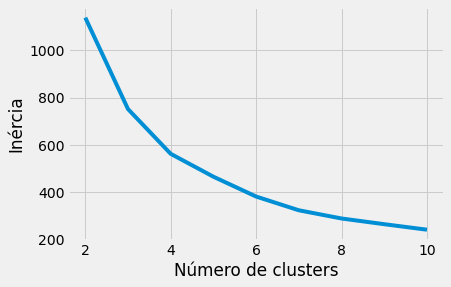

In [22]:
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Número de clusters");
plot.set_ylabel("Inércia");

O gráfico tem "dobras" em _k=3_,_k=4_ e _k=6_. Modelos com mais de 6 clusters não parecem reduzir muito a inércia. Um modelo de 4 clusters pode ser ideal. Nem sempre é fácil determinar o número de _k_ através do gráfico. Nesse caso, podemos utilizar o pacote _kneed_ como mais uma ajuda. 

In [23]:
# importamos o pacote

from kneed import KneeLocator

# definimos o número k através KneeLocator

kl = KneeLocator(range(2, 11), inertia, curve="convex", direction="decreasing")

kl.elbow

4

A função confirmou a suposição de _k=4_. 

Para calcular o coeficiente de silhueta (_silhouette score_) usamos a função `silhouette_score()` que importamos de `sklearn.metrics`. A função tem dois parâmetros obrigatórios: os dados de treinamento e os rótulos de cluster atribuídos. Vamos calcular o coeficiente de silhueta para o modelo com _k=3_.

In [24]:
kmeans3_sil_score = silhouette_score(df_train, kmeans3.labels_)
kmeans3_sil_score

0.3519355723318066

Esse valor não é muito útil se não tivermos nada com que compará-lo. Assim como fizemos para a inércia, criamos uma função auxilar que compara o coeficiente de silhueta para cada valor de _k_, de 2 a 10.

In [25]:
# função que compara o coeficiente de silhueta para cada valor de k=2-10

def kmeans_sil(num_clusters, x_vals):
    '''
    Entrada:
        num_clusters: (lista de inteiros)  - os valores de k
        x_vals:          (array)         - os dados de treinamento

    Saida: 
        sil_score:      (lista)          - A lista com coeficientes de silhueta para cada k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [26]:
# Calculamos os coeficientes de silhueta usando a função (demora um pouco)

%time
sil_score = kmeans_sil(num_clusters, df_train)
sil_score

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 15 µs


[0.3321106801239554,
 0.3519355723318066,
 0.34216590198532093,
 0.32099922175875456,
 0.3468999195833895,
 0.3459220007662363,
 0.3333249952327911,
 0.31929036066425137,
 0.318113833065173]

Agora construimos gráfico dos coeficientes de silhueta para cada valor de _k_, assim como fizemos para a inércia. No entanto, para os coeficientes de silhueta, números mais próximos de 1 são melhores.

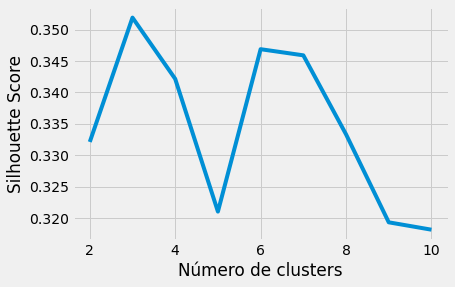

In [27]:
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("Número de clusters");
plot.set_ylabel("Silhouette Score");

O gráfico indica que o coeficiente de silhueta está mais próximo de 1 quando os dados são agrupados em _3_ ou em _6_ clusters. Isso confirma o que vimos na análise anterior, onde notamos que _k=6_. Com esta informação, construimos o modelo _k-means_ com 6 clusters como nosso modelo final.

## O modelo com k=6

In [28]:
# instanciamos modelo k-means para 6 clusters e fazemos ajuste

kmeans6 = KMeans(n_clusters=6, random_state=42).fit(df_train)

In [68]:
print('Clusters: ', kmeans6.labels_)
print('Inertia: ', kmeans6.inertia_)
print('Unique labels:', np.unique(kmeans6.labels_))

Clusters:  [5 2 0 ... 1 5 2]
Inertia:  382.57871576092464
Unique labels: [0 1 2 3 4 5]


Como no caso anterior, podemos visualizar o resultado através de gráfico de dispersão usando um datadrame de Pandas e a biblioteca `seaborn`.

In [30]:
# transformamos array em dataframe
df_viz = pd.DataFrame(df_train, columns = ["component_1", "component_2"])

# criamos nova coluna com atribuiçõ de cluster
df_viz['cluster'] = kmeans6.labels_
df_viz.head(20)

,component_1,component_2,cluster
0,0.548348,0.714920,5
1,0.702919,0.337144,2
2,0.431018,0.560622,0
3,0.445137,0.535683,0
4,0.530451,0.403651,0
5,0.297616,0.415402,4
6,0.648420,0.444101,3
7,0.559605,0.455882,0
8,0.400469,0.563586,1
9,0.567919,0.482175,0


Com nova coluna com atribuiçõ de clusters podemos analisar o que os torna diferentes um do outro. As vezes, faz mais sentido fazer esse análise nos dados originais, antes de redução de dimensão. Mas no nosso caso temos a dimensão muito grande para fazer o análise. Por isso, usamos os dados depois da redução de dimensão. 

Finalmente, podemos construir o gráfico de dispersão para visualização dos dados agrupados. Usamo scatterplot da biblioteca seaborn. 

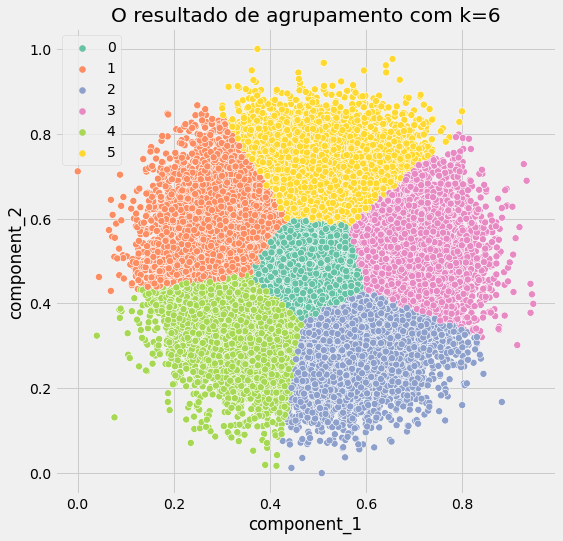

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))

scat = sns.scatterplot('component_1', 'component_2',
       s=50,
       data=df_viz,
       hue=kmeans6.labels_,
       #style=classes_tp,
        palette="Set2")
 
scat.set_title("O resultado de agrupamento com k=6")
plt.legend()
plt.show()

O resultado do agrupamento com _k=6_ parece muito diferente do caso com _k=3_. 

## Teste do modelo

Nessa etapa, fazemos teste de modelo com os dados de teste, que foram separados antes.

In [32]:
kmeans6_test = KMeans(n_clusters=6, random_state=42).fit(df_test)
print('Clusters: ', kmeans6_test.labels_)
print('Inertia: ', kmeans6_test.inertia_)
print(kmeans6_test.labels_)
print('Unique labels:', np.unique(kmeans6_test.labels_))

Clusters:  [2 4 3 ... 1 5 3]
Inertia:  96.41068753988829
[2 4 3 ... 1 5 3]
Unique labels: [0 1 2 3 4 5]


In [33]:
# transformamos array em dataframe
df_viz_test = pd.DataFrame(df_test, columns = ["component_1", "component_2"])

# criamos nova coluna com atribuiçõ de cluster
df_viz_test['cluster'] = kmeans6_test.labels_
df_viz_test.head(20)

,component_1,component_2,cluster
0,0.483903,0.600863,2
1,0.323536,0.550481,4
2,0.451304,0.283063,3
3,0.626467,0.223812,3
4,0.548507,0.591232,0
5,0.542714,0.838718,0
6,0.636527,0.515782,5
7,0.408223,0.354839,1
8,0.383018,0.698061,4
9,0.736097,0.436302,5


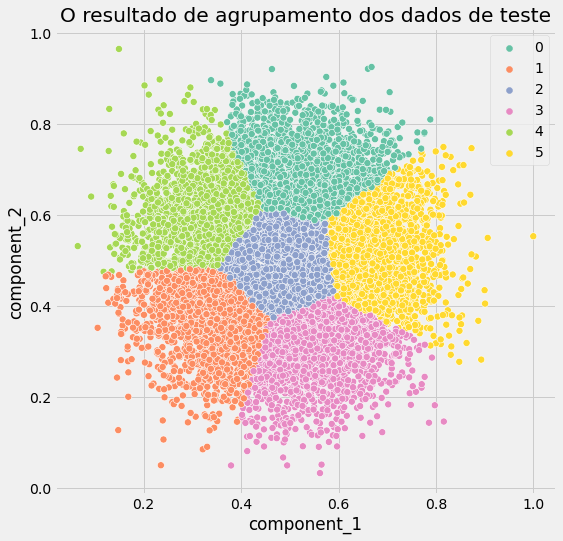

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))

scat = sns.scatterplot('component_1', 'component_2',
       s=50,
       data=df_viz_test,
       hue=kmeans6_test.labels_,
       #style=classes_tp,
        palette="Set2")
 
scat.set_title("O resultado de agrupamento dos dados de teste")
plt.legend()
plt.show()

Os dados de teste seguem o mesmo padrão dos dados de treinamento.

## Construção de Pipeline


Nesta seção vamos construir um pipeline de classificação usando k-means. 

Os dados precisam ser pré-processados antes de entrar num algoritmo de cluster. Isso já foi feito na etapa de pré-processamento. 

In [35]:
data = df_train

In [39]:
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

Criamos o pipeline de agrupamento usando o algoritmo k-means:

In [40]:
clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=6,
                   random_state=42,
               ),
           ),
       ]
    )

A classe `Pipeline` pode ser "encadeada" para formar um pipeline maior. Criamos um pipeline classificação k-means de ponta a ponta (_end-to-end_), passando os pipelines de "preprocessor" e "clusterer" para o Pipeline:

In [41]:
pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )

Executamos todas as etapas do pipeline chamando `.fit()` com dados como argumento:

In [42]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(n_clusters=6, random_state=42))]))])

O pipeline executa todas as etapas necessárias para o algoritmo k-means agrupar os dados. Avaliamos o desempenho calculando o coeficiente de silhueta:

In [43]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.347593559032279

O primeiro pipeline teve um bom desempenho, mas ainda há espaço para melhorias. Podemos usar as métricas de avaliação para identificar o número apropriado de componentes na etapa de redimensionamento de dados.

No pŕoximo passo, variamos o número _n_ de `n_components` e salvamos as métricas de avaliação para cada iteração. Adicionamos mais um método de avaliação, chamado de _adjusted rand index_ (ARI). O ARI usa atribuições de clusters verdadeiros para medir a similaridade entre rótulos verdadeiros e previstos. Depois vamos visualizar a relação entre a número de componentes e os coeficientes de silhueta.

#### Observação
Não deu sufucientemente tempo para finalizar esse passo. Mas deixei o código embaixo.

In [ ]:
# esvaziamos a lista com coeficientes de silhueta 
sil_score = []
    
# criamos uma lista para coeficientes do ARI
ari_score = []

for n in range(2, 3):
    # isso define o número de componentes para pca,
    # mas não muda outras etapas
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)
     
         
    silhouette_coef = silhouette_score(pipe["preprocessor"].transform(data),pipe["clusterer"]["kmeans"].labels_)
    
    ari = adjusted_rand_score(true_labels,pipe["clusterer"]["kmeans"].labels_)
        
           
    # adicionamos os coeficientes nas listas
    sil_score.append(silhouette_coef)
    ari_score.append(ari)

## Conclusão

Neste projeto, realizamos uma análise dos dados coletados das máquinas e equipamentos e desenvolvemos um modelo de aprendizado de máquina. Nosso objetivo era identificar padrões presentes nos equipamentos sob análise. Para atingir esse propósito, implementamos diversas técnicas, tais como análise exploratória de dados, redução de dimensionalidade por meio da Análise de Componentes Principais e redimensionamento dos dados utilizando o método `MinMaxScale`.

O modelo escolhido foi o algoritmo k-means, dada a natureza dos dados, os quais não eram rotulados. Inicialmente, optamos por _k=3_, porém, após a aplicação de dois métodos distintos para determinar o número ideal de k, optamos por _k=6_. Em seguida, desenvolvemos um pipeline de aprendizado de máquina para a implementação do modelo.

Observamos que o desempenho do modelo pode ser aprimorado ao identificar o número apropriado de componentes n durante a etapa de redimensionamento de dados, um passo que ainda não foi concluído. Adicionalmente, sugerimos melhorias no pipeline, incluindo a incorporação de uma etapa inicial de análise exploratória de dados e a disponibilização do algoritmo no GitHub no final do pipeline. 